In [1]:
import tensorflow as tf
import numpy as np

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 81s 0us/step
Train: (50000, 32, 32, 3) (50000,)
Test:  (10000, 32, 32, 3) (10000,)



Label distribution in training set:
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


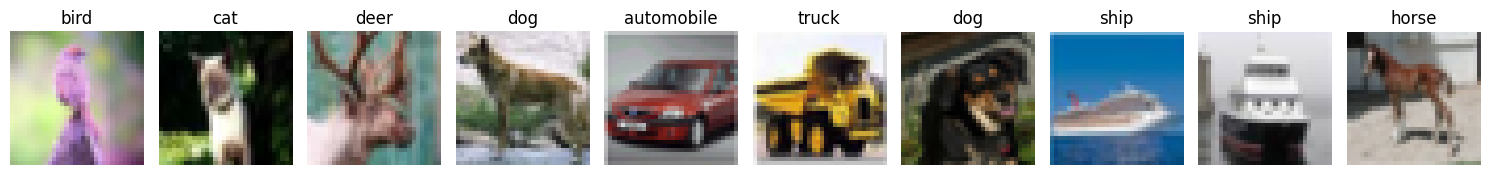

In [5]:
import matplotlib.pyplot as plt

# Define the class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Let’s look at the distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)
print("\nLabel distribution in training set:")
for label, count in zip(unique, counts):
    print(f"{class_names[label]}: {count}")

# Function to plot random images from the dataset
def plot_random_images(images, labels, class_names, num_images=10):
    """
    Plots a specified number of random images from the dataset,
    labeled by their CIFAR-10 class names.
    """
    # Choose random indices
    random_indices = np.random.choice(images.shape[0], num_images, replace=False)
    
    # Define the size of the figure based on how many images we show
    plt.figure(figsize=(15, 2))

    for i, idx in enumerate(random_indices):
        # Subplot arrangement: 1 row, 'num_images' columns
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx]])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Plot some random images from the training set
plot_random_images(x_train, y_train, class_names, num_images=10)

In [ ]:
model = tf.keras.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # layer 4
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # layer 5
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history_single_filter = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,               # you can increase this
    batch_size=32,
    verbose=1
)

ValueError: Computed output size would be negative. Received `inputs shape=(None, 0, 0, 128)`, `kernel shape=(3, 3, 128, 512)`, `dilation_rate=[1 1]`.